## <B><center> Loan Default Case Study </center></B>

### <B> About the Company </B>

NeoFinance is a leading fintech company that provides personal loans, home loans, and business loans to individuals and SMEs. Established in 2015, the company aims to make credit accessible to a wider audience by leveraging AI-driven risk assessment models.

NeoFinance serves over 2 million customers across India, Southeast Asia, and the Middle East, using a digital-first approach to approve loans in minutes. However, an increasing number of loan defaults has led the company to explore AI-powered risk assessment models.

### <B> Problem Statement </B>

NeoFinance has seen a rise in loan defaults over the past two years due to economic instability and changing borrower behavior. Currently, their approval system relies on traditional credit scores (CIBIL, Experian, etc.), which fail to capture important factors like:

- Income fluctuations
- Spending patterns
- Social & behavioral data

As a result, NeoFinance approves loans for high-risk customers, leading to financial losses. The company wants an AI-powered Loan Default Prediction System that:
✅ Identifies high-risk applicants before loan approval
✅ Predicts default probability based on applicant behavior
✅ Helps the finance team optimize interest rates & approval criteria


### <B> Business Perspective </B>

#### <B>🔹 Why Does NeoFinance Need This? </B>
NeoFinance currently relies on traditional underwriting methods, which:
🚩 Approve risky applicants → Increasing default rates
🚩 Reject potentially good applicants → Losing genuine customers

An AI-driven loan prediction model will help:
✅ Reduce default rates by filtering out high-risk applicants
✅ Increase profitability by optimizing loan approval criteria
✅ Offer better interest rates based on a borrower's risk profile

#### <B>🔹 Expected Business Impact </B>
📉 20-30% reduction in loan defaults → Lower financial losses
📈 10-15% increase in loan approval rate → More revenue from safer customers
⚡ Faster loan approvals → Reduced manual review time, improving customer experience

NeoFinance will integrate this AI-driven risk model into its loan application portal, ensuring real-time risk assessment before loan disbursement.

### <B> Data Description </B>

#### Input Variables

- <B>Applicant_Income</B> – Annual income of the loan applicant in USD.
- <B>Loan_Amount</B> – Total amount requested for the loan in USD.
- <B>Credit_Score</B> – A numerical value (300-850) representing creditworthiness.
- <B>Debt_to_Income_Ratio</B> – Ratio of total monthly debt to gross monthly income.
- <B>Employment_History</B> – Number of years the applicant has been employed.
- <B>Previous_Defaults</B> – Number of past loan defaults by the applicant.
- <B>Loan_Term</B> – Duration of the loan in months (e.g., 12, 24, 36, etc.).
- <B>Interest_Rate</B> – Annual interest rate charged on the loan.
- <B>Loan_Purpose</B> – Reason for taking the loan (e.g., Personal, Business, Education).
- <B>Marital_Status</B> – Applicant’s marital status (Single, Married, Divorced, Widowed).
- <B>Number_of_Dependents</B> – Number of financial dependents (children, spouse, etc.).
- <B>Residence_Status</B> – Applicant’s living situation (Rented, Owned, Mortgaged).
- <B>Bankruptcies</B> – Number of previous bankruptcy filings.
- <B>Annual_Expenses</B> – Total yearly expenses of the applicant in USD.
- <B>Co-Applicant_Income</B> – Annual income of a co-applicant (if any).
- <B>Education_Level</B> – Highest education level attained (High School, Bachelor's, etc.).
- <B>Self_Employed</B> – Binary flag indicating self-employment status (1 → Yes, 0 → No).
- <B>Home_Ownership</B> – Type of home ownership (Own, Rent, Mortgage).
- <B>Credit_History_Length</B> – Number of years the applicant has held credit accounts.
- <B>Missed_Payments</B> – Count of late or missed payments in the past year.
- <B>Loan_Application_Type</B> – Type of loan application (Individual or Joint).
- <B>Monthly_Installment</B> – Fixed monthly payment amount towards the loan.
- <B>mployment_Type</B> – Nature of employment (Salaried, Self-Employed, Unemployed, Retired).
- <B>State</B> – State of residence (e.g., CA, NY, TX, FL).

#### Target Variable
- <B>Default</B> – Target variable (1 → Defaulted, 0 → No Default).


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('loan_default_dataset.csv')

Let us pull top 5 rows of the dataset

In [3]:
df.head()

,Applicant_Income,Loan_Amount,Credit_Score,Debt_to_Income_Ratio,Employment_History,Previous_Defaults,Loan_Term,Interest_Rate,Loan_Purpose,Marital_Status,...,Education_Level,Self_Employed,Home_Ownership,Credit_History_Length,Missed_Payments,Loan_Application_Type,Monthly_Installment,Employment_Type,State,Default
0,141958,38905,558,0.64,24,2,60,4.77,Medical,Married,...,High School,0,Own,10,9,Joint,3669,Retired,NY,0
1,35795,32103,402,0.52,21,2,12,14.59,Personal,Married,...,Bachelor's,0,Rent,14,2,Joint,3288,Unemployed,NY,0
2,20860,41188,400,0.55,26,4,60,10.05,Personal,Widowed,...,Master's,1,Mortgage,23,7,Joint,4862,Salaried,NC,0
3,123694,10845,497,0.63,23,2,60,12.67,Personal,Single,...,High School,0,Mortgage,28,1,Individual,3659,Retired,MI,1
4,148106,26162,525,0.18,11,4,48,8.70,Education,Married,...,Master's,0,Own,29,2,Individual,616,Retired,PA,0


Analysis of the shape of the dataset is also important to understand the dataset.

In [4]:
df.shape

(5000, 25)

As we can see, there are 5000 rows and 25 columns in the dataset.

Let's conduct a procedural analysis of the dataset. This process includes:
- Assessing missing values in the dataset
- Detecting duplicate entries in the dataset
- Examining the data type of each column
- Determining the count of unique values in each column
- Investigating the categories within the categorical columns
- Reviewing summary statistics of the dataset

### Assessing Missing Values

In [5]:
df.isnull().sum()

Applicant_Income         0
Loan_Amount              0
Credit_Score             0
Debt_to_Income_Ratio     0
Employment_History       0
Previous_Defaults        0
Loan_Term                0
Interest_Rate            0
Loan_Purpose             0
Marital_Status           0
Number_of_Dependents     0
Residence_Status         0
Bankruptcies             0
Annual_Expenses          0
Co-Applicant_Income      0
Education_Level          0
Self_Employed            0
Home_Ownership           0
Credit_History_Length    0
Missed_Payments          0
Loan_Application_Type    0
Monthly_Installment      0
Employment_Type          0
State                    0
Default                  0
dtype: int64

As evidenced above, the dataset has no missing values.

### Detecting Duplicate Entries

In [6]:
df.duplicated().sum()

np.int64(0)

We can see that there are no duplicate entries in the dataset.

### Examining the Data Type of Each Column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Applicant_Income       5000 non-null   int64  
 1   Loan_Amount            5000 non-null   int64  
 2   Credit_Score           5000 non-null   int64  
 3   Debt_to_Income_Ratio   5000 non-null   float64
 4   Employment_History     5000 non-null   int64  
 5   Previous_Defaults      5000 non-null   int64  
 6   Loan_Term              5000 non-null   int64  
 7   Interest_Rate          5000 non-null   float64
 8   Loan_Purpose           5000 non-null   object 
 9   Marital_Status         5000 non-null   object 
 10  Number_of_Dependents   5000 non-null   int64  
 11  Residence_Status       5000 non-null   object 
 12  Bankruptcies           5000 non-null   int64  
 13  Annual_Expenses        5000 non-null   int64  
 14  Co-Applicant_Income    5000 non-null   int64  
 15  Educ

There are
- 15 columns with int64 data type
- 2 columns with float64 data type
- 8 columns with object data type

### Determining the Count of Unique Values in Each Column

In [8]:
df.nunique()

Applicant_Income         4898
Loan_Amount              4745
Credit_Score              550
Debt_to_Income_Ratio       71
Employment_History         40
Previous_Defaults           5
Loan_Term                   5
Interest_Rate            1227
Loan_Purpose                5
Marital_Status              4
Number_of_Dependents        5
Residence_Status            3
Bankruptcies                3
Annual_Expenses          4867
Co-Applicant_Income      4870
Education_Level             4
Self_Employed               2
Home_Ownership              3
Credit_History_Length      29
Missed_Payments            10
Loan_Application_Type       2
Monthly_Installment      3097
Employment_Type             4
State                      10
Default                     2
dtype: int64

### Investigating the categories within the categorical columns

First, we will segregate the numerical and categorical features

In [9]:
# Extracting categorical features
cat_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", cat_features)

# Extracting numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = num_features.drop(['Self_Employed'], errors='ignore')  # Adding 'errors' argument
print("Numerical Features:", num_features)

Categorical Features: Index(['Loan_Purpose', 'Marital_Status', 'Residence_Status', 'Education_Level',
       'Home_Ownership', 'Loan_Application_Type', 'Employment_Type', 'State'],
      dtype='object')
Numerical Features: Index(['Applicant_Income', 'Loan_Amount', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Employment_History', 'Previous_Defaults',
       'Loan_Term', 'Interest_Rate', 'Number_of_Dependents', 'Bankruptcies',
       'Annual_Expenses', 'Co-Applicant_Income', 'Credit_History_Length',
       'Missed_Payments', 'Monthly_Installment', 'Default'],
      dtype='object')


In [10]:
for feature in cat_features:
    print(f"{feature}: {df[feature].unique()}")

Loan_Purpose: ['Medical' 'Personal' 'Education' 'Home Improvement' 'Business']
Marital_Status: ['Married' 'Widowed' 'Single' 'Divorced']
Residence_Status: ['Rented' 'Mortgaged' 'Owned']
Education_Level: ['High School' "Bachelor's" "Master's" 'PhD']
Home_Ownership: ['Own' 'Rent' 'Mortgage']
Loan_Application_Type: ['Joint' 'Individual']
Employment_Type: ['Retired' 'Unemployed' 'Salaried' 'Self-Employed']
State: ['NY' 'NC' 'MI' 'PA' 'GA' 'CA' 'FL' 'OH' 'IL' 'TX']


Above is the list of values in each categorical feature.

### Reviewing Summary Statistics of the Dataset

In [11]:
df.describe()

,Applicant_Income,Loan_Amount,Credit_Score,Debt_to_Income_Ratio,Employment_History,Previous_Defaults,Loan_Term,Interest_Rate,Number_of_Dependents,Bankruptcies,Annual_Expenses,Co-Applicant_Income,Self_Employed,Credit_History_Length,Missed_Payments,Monthly_Installment,Default
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,84563.193000,27531.256400,573.710400,0.449458,19.778800,2.061400,36.242400,8.781068,1.996200,0.994400,55381.474600,50122.033000,0.157000,14.85020,4.501000,2570.412800,0.300800
std,37886.080677,12939.291117,159.273181,0.203887,11.570819,1.430958,16.939098,3.600501,1.421334,0.813696,26032.108629,28696.892916,0.363837,8.44931,2.903185,1419.020565,0.458652
min,20055.000000,5016.000000,300.000000,0.100000,0.000000,0.000000,12.000000,2.500000,0.000000,0.000000,10013.000000,17.000000,0.000000,1.00000,0.000000,100.000000,0.000000
25%,51333.750000,16419.750000,435.000000,0.270000,10.000000,1.000000,24.000000,5.720000,1.000000,0.000000,32987.000000,25113.250000,0.000000,7.00000,2.000000,1352.000000,0.000000
50%,84338.500000,27497.000000,573.000000,0.450000,20.000000,2.000000,36.000000,8.825000,2.000000,1.000000,54926.000000,50305.500000,0.000000,15.00000,5.000000,2597.000000,0.000000
75%,117152.750000,38709.250000,712.250000,0.630000,30.000000,3.000000,48.000000,11.910000,3.000000,2.000000,77643.250000,75159.750000,0.000000,22.00000,7.000000,3790.000000,1.000000
max,149992.000000,49993.000000,849.000000,0.800000,39.000000,4.000000,60.000000,15.000000,4.000000,2.000000,99966.000000,99983.000000,1.000000,29.00000,9.000000,4999.000000,1.000000


### Let us assess the correlation between the features

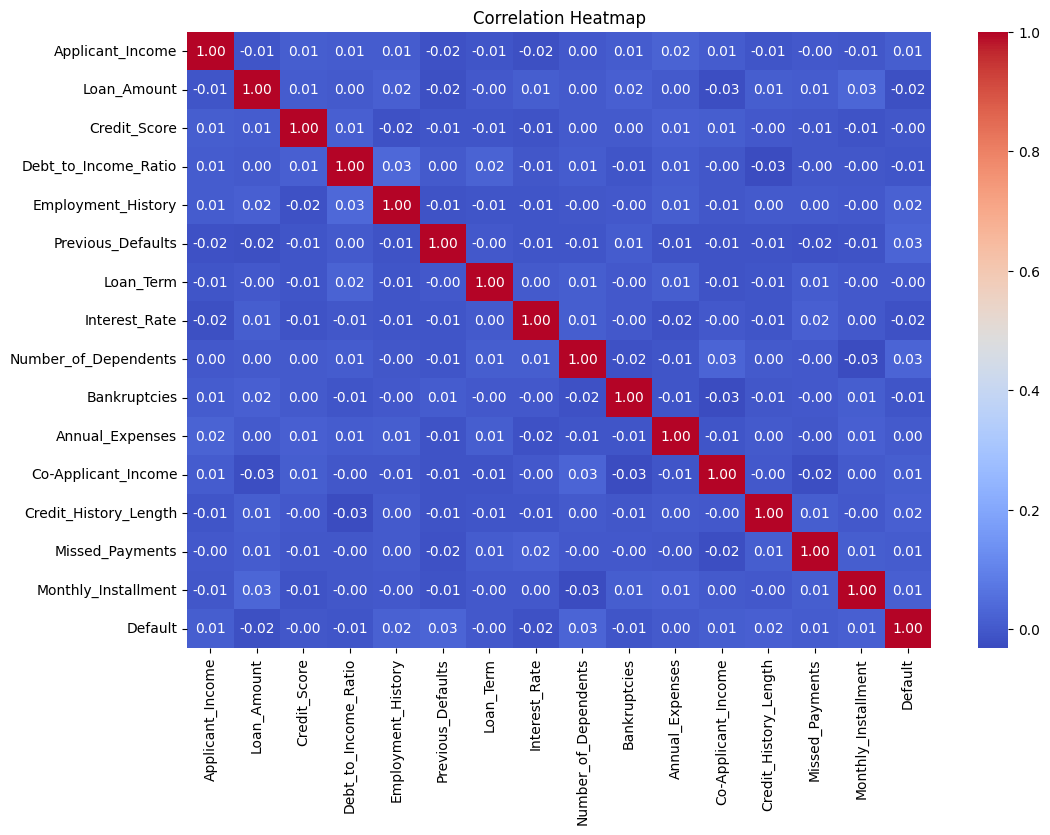

In [12]:
corr = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Chi Square Test 

Let us perform the Chi-Square Test to assess the relationship between categorical features

In [13]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(df, feature1, feature2):

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    # Observed Values
    observed_values = contingency_table.values

    # Expected Values
    _, _, _, expected_values = chi2_contingency(contingency_table)

    # Degrees of Freedom
    no_of_rows = len(contingency_table.iloc[0:, 0])
    no_of_columns = len(contingency_table.iloc[0, 0:])
    deg_f = (no_of_rows - 1) * (no_of_columns - 1)

    print("Degrees of Freedom: ", deg_f)

    # Significance Level 5%
    alpha = 0.05
    print("Significance Level: ", alpha)

    # Chi-Square Statistic
    chi_square = sum([(o-e)**2./e for o, e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]

    print("Chi-Square Statistic: ", chi_square_statistic)

    # Critical Value
    critical_value = chi2.ppf(1-alpha, deg_f)
    print("Critical Value: ", critical_value)

    # P-Value
    p_value = 1-chi2.cdf(x = chi_square_statistic, df = deg_f)

    print("P-Value: ", p_value)

    if chi_square_statistic >= critical_value:
        print("Reject H0, there is a relationship between the two categorical variables.")
    else:
        print("Retain H0, there is no relationship between the two categorical variables.")


    if p_value <= alpha:
        print("Reject H0, there is a relationship between the two categorical variables.")
    else:
        print("Retain H0, there is no relationship between the two categorical variables.")

In [14]:
for x in cat_features:
    for i in cat_features:
        if i != x:
            print("Chi-Square Test between {} and {}".format(x, i))
            chi_square_test(df, x, i)
            print('\n')
            print("====================================================="*2)
            print('\n')

Chi-Square Test between Loan_Purpose and Marital_Status
Degrees of Freedom:  12
Significance Level:  0.05
Chi-Square Statistic:  5.143359620547606
Critical Value:  21.02606981748307
P-Value:  0.9530183072787276
Retain H0, there is no relationship between the two categorical variables.
Retain H0, there is no relationship between the two categorical variables.




Chi-Square Test between Loan_Purpose and Residence_Status
Degrees of Freedom:  8
Significance Level:  0.05
Chi-Square Statistic:  6.2709743050679965
Critical Value:  15.50731305586545
P-Value:  0.6169073509779678
Retain H0, there is no relationship between the two categorical variables.
Retain H0, there is no relationship between the two categorical variables.




Chi-Square Test between Loan_Purpose and Education_Level
Degrees of Freedom:  12
Significance Level:  0.05
Chi-Square Statistic:  9.319673284544038
Critical Value:  21.02606981748307
P-Value:  0.6754107024408573
Retain H0, there is no relationship between the two cate

As per the Chi Square test results, we can see that there is no relationship between any of the categorical features.

Now, let us perform Chi-Square test to check relationship between cat_features and target variable

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency


# Array of categorical features
cat_features = cat_features

# Target variable
target = 'Default'

# Conduct chi-square tests for each categorical feature
for feature in cat_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df["Default"])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Output the results
    print(f"Chi-Square Test for {feature} vs {target}:")
    print(f"Chi2 Statistic: {chi2:.2f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}\n")
    
    # Check significance
    alpha = 0.05  # Set your significance level
    if p <= alpha:
        print(f"Result: Reject the null hypothesis - {feature} and {target} are likely dependent.\n")
    else:
        print(f"Result: Retain the null hypothesis - {feature} and {target} are likely independent.\n")

    print("====================================================="*2)

Chi-Square Test for Loan_Purpose vs Default:
Chi2 Statistic: 4.83
P-Value: 0.3055
Degrees of Freedom: 4
Expected Frequencies:
[[748.144  321.856 ]
 [692.208  297.792 ]
 [701.9968 302.0032]
 [680.3216 292.6784]
 [673.3296 289.6704]]

Result: Retain the null hypothesis - Loan_Purpose and Default are likely independent.

Chi-Square Test for Marital_Status vs Default:
Chi2 Statistic: 3.18
P-Value: 0.3649
Degrees of Freedom: 3
Expected Frequencies:
[[839.7392 361.2608]
 [874.6992 376.3008]
 [883.0896 379.9104]
 [898.472  386.528 ]]

Result: Retain the null hypothesis - Marital_Status and Default are likely independent.

Chi-Square Test for Residence_Status vs Default:
Chi2 Statistic: 0.12
P-Value: 0.9400
Degrees of Freedom: 2
Expected Frequencies:
[[1143.8912  492.1088]
 [1176.7536  506.2464]
 [1175.3552  505.6448]]

Result: Retain the null hypothesis - Residence_Status and Default are likely independent.

Chi-Square Test for Education_Level vs Default:
Chi2 Statistic: 1.97
P-Value: 0.5794


### Exploratory Data Analysis

Let us move on to the exploratory data analysis (EDA) to analyze the distribution of the features and understand the relationship between the target variable and the features

We will use Box Plots to visualize the distribution of the data in numerical features

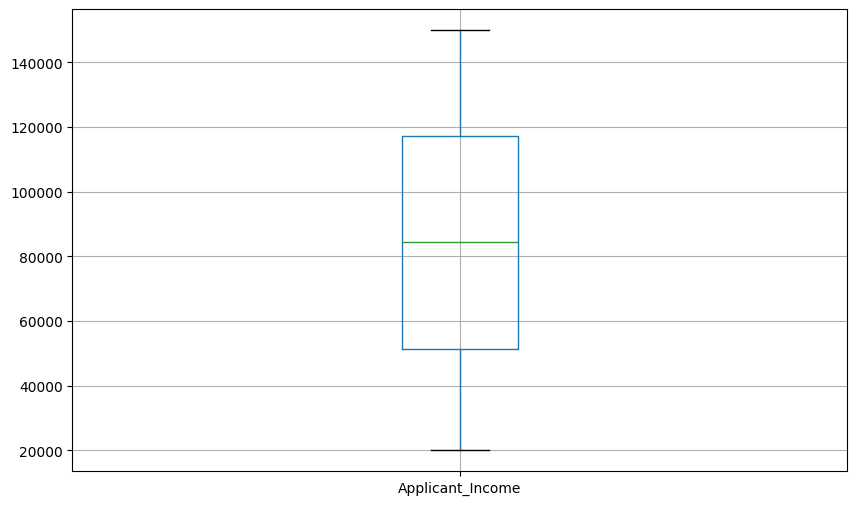

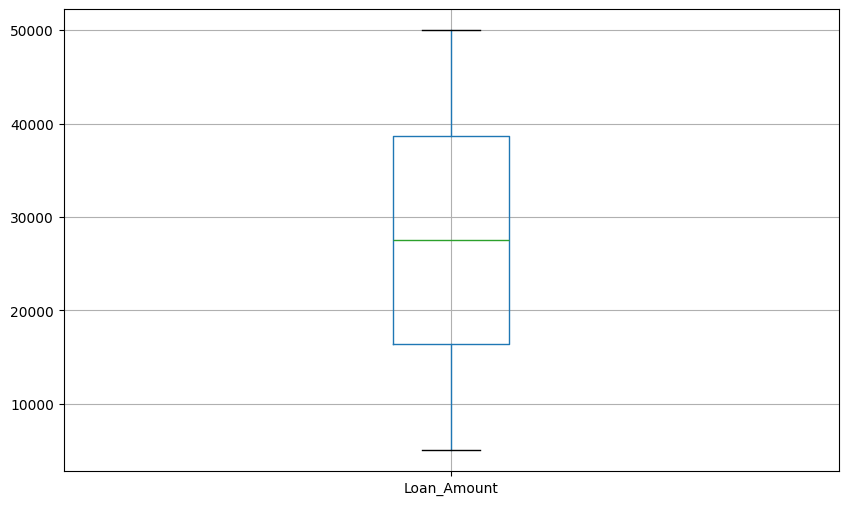

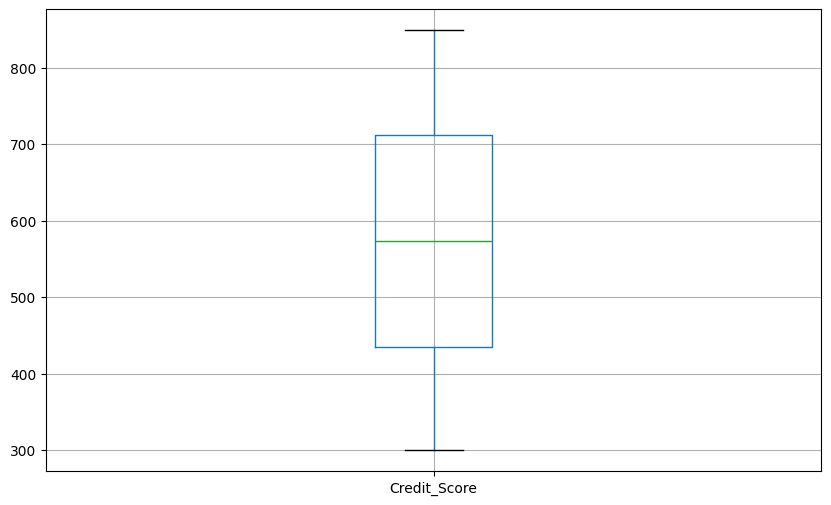

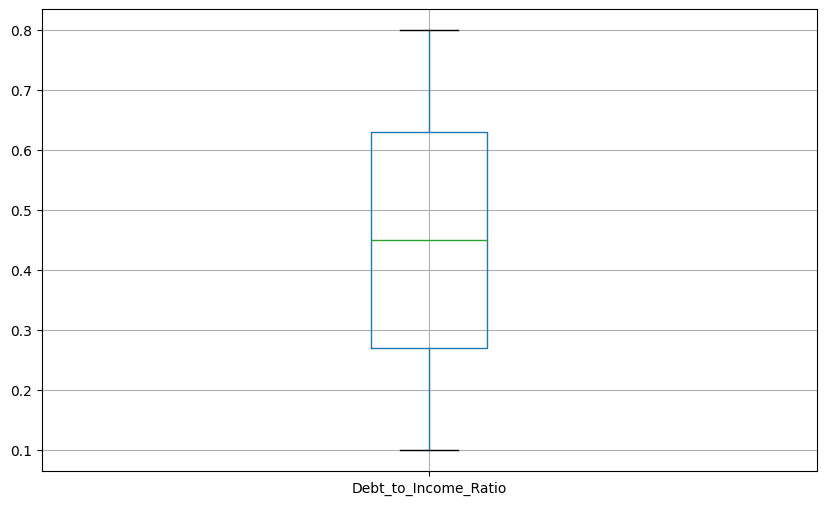

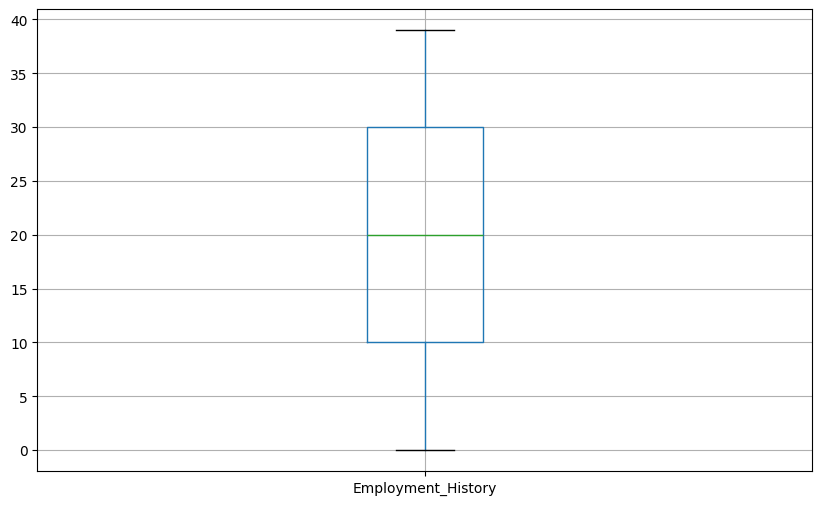

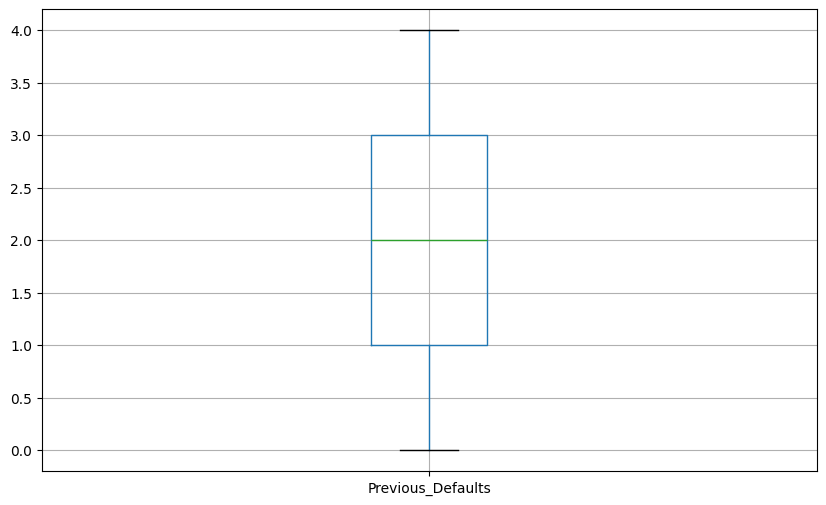

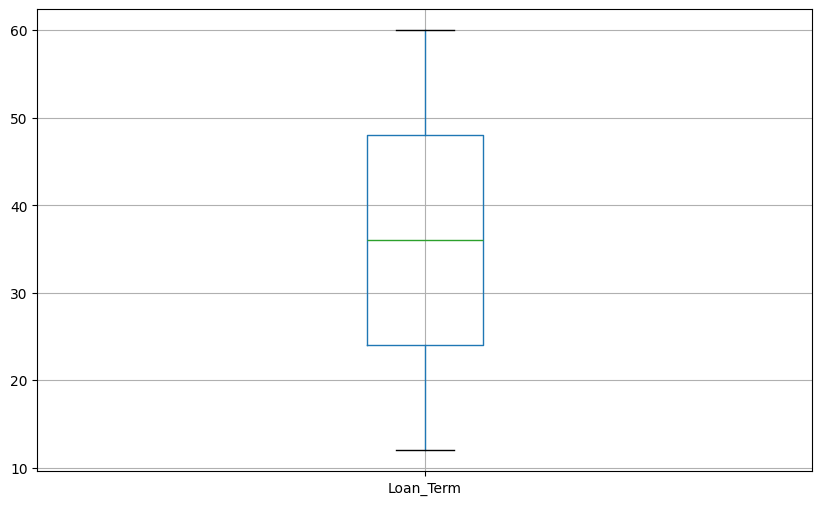

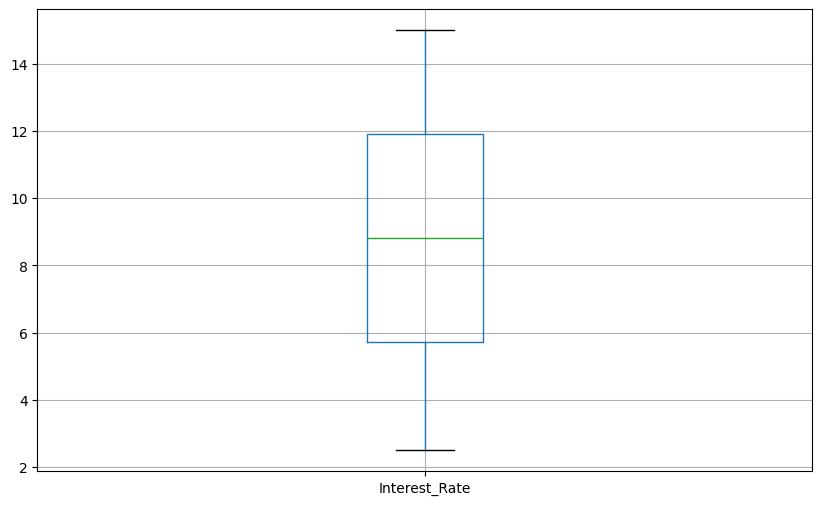

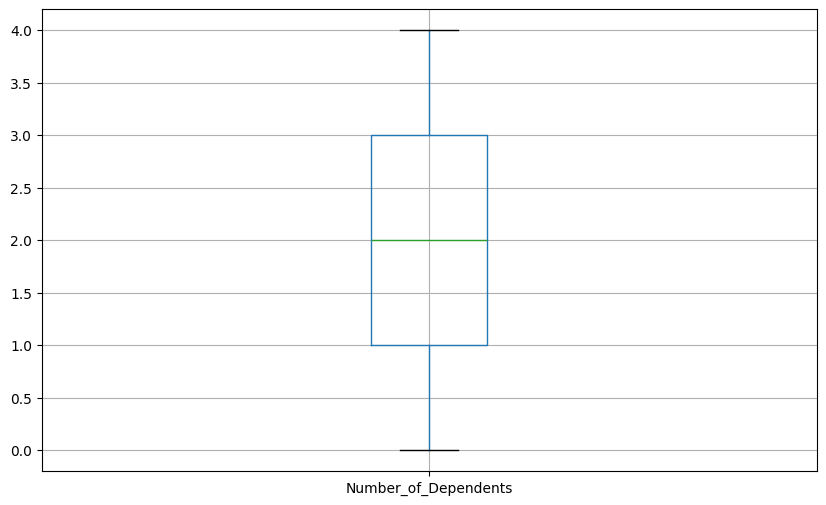

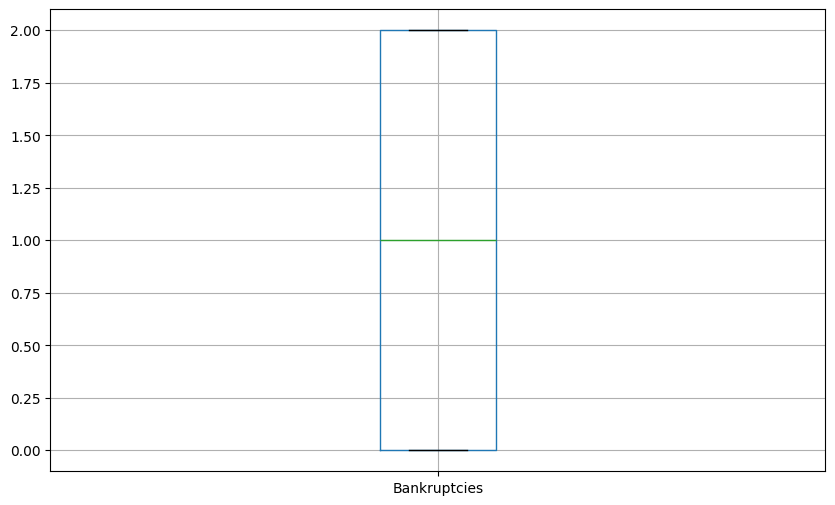

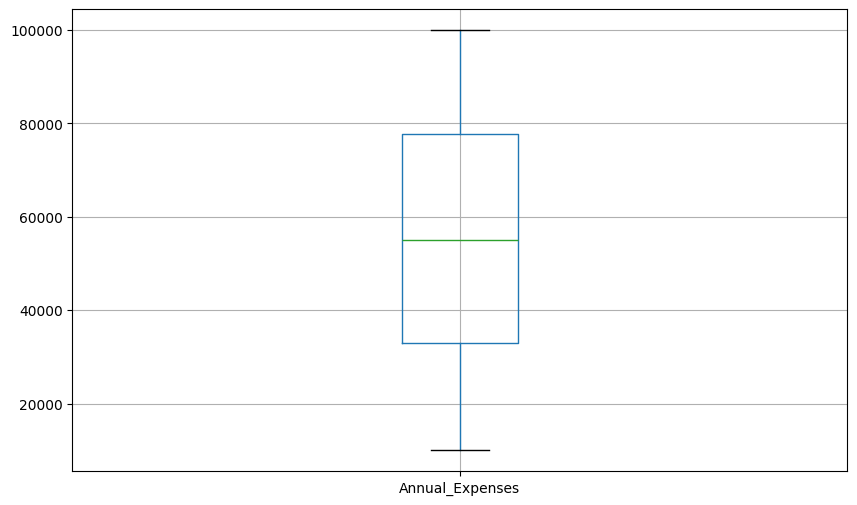

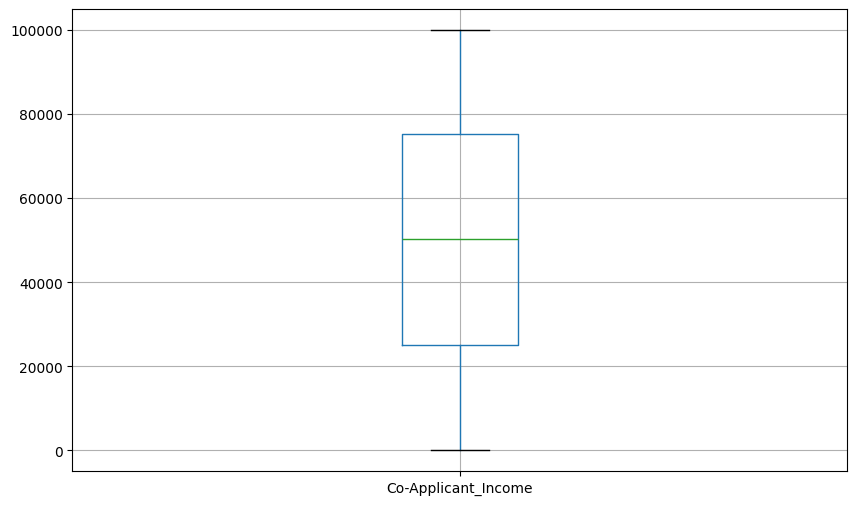

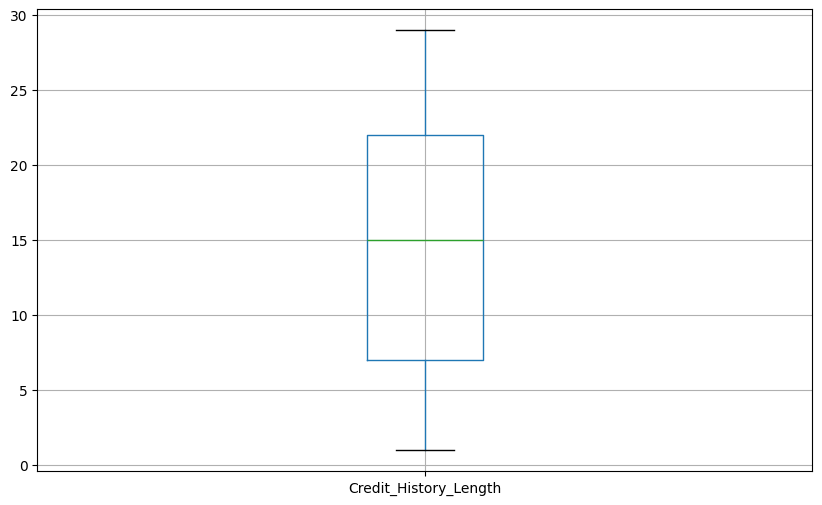

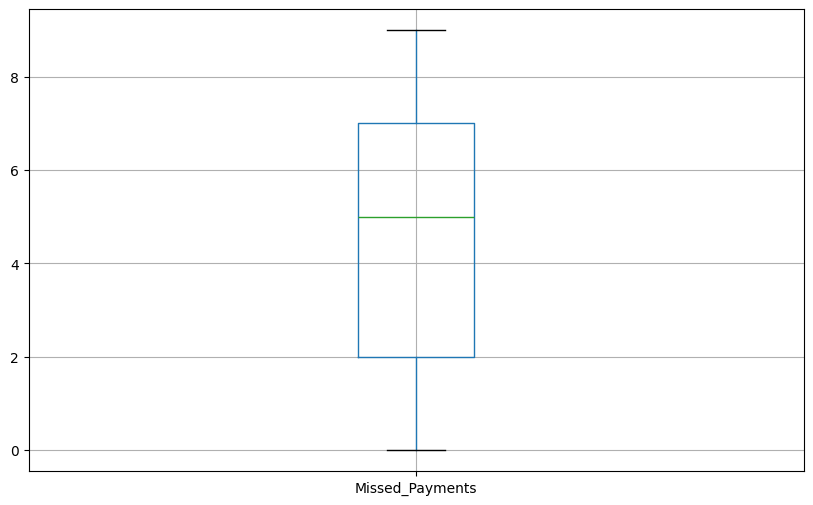

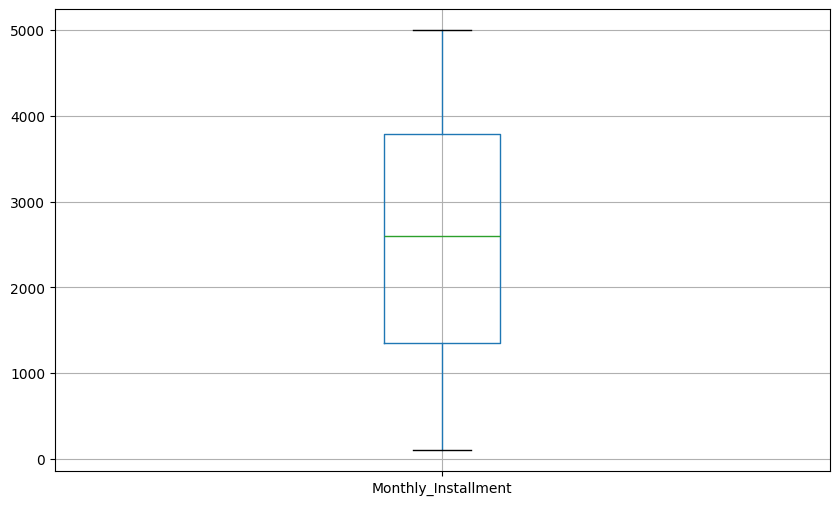

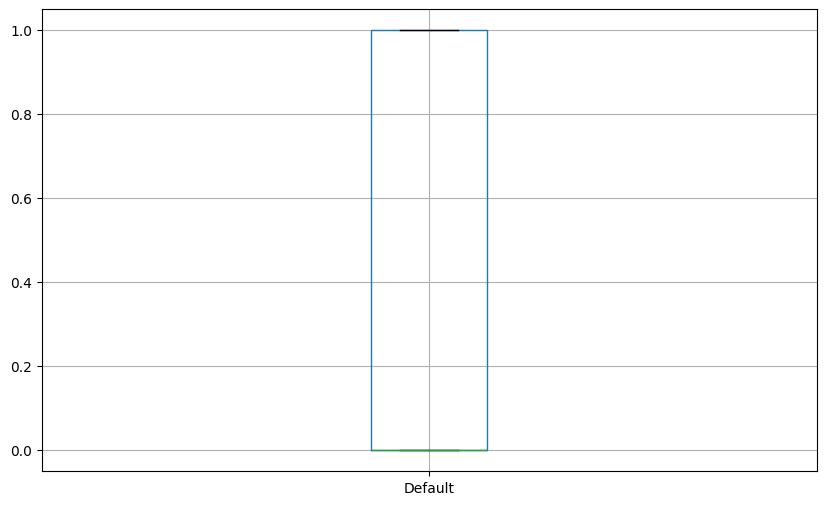

In [16]:
for i in range(len(num_features)):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=num_features[i], vert=True)
    plt.show()

Insights from the Visual Analysis:

- **Applicant Income:**  
  - 0-25% of applicants earn between $20,000 and $50,000.  
  - 25-50% of applicants earn between $50,000 and $82,000.  
  - 50-75% of applicants earn between $82,000 and $119,000.  
  - 75-100% of applicants earn between $119,000 and $150,000.

- **Loan Amount:**  
  - 0-25% of applicants have loans between $2,000 and $18,000.  
  - 25-50% of applicants have loans between $18,000 and $28,000.  
  - 50-75% of applicants have loans between $28,000 and $39,000.  
  - 75-100% of applicants have loans between $39,000 and $50,000.

- **Credit Score:**  
  - 0-25% of applicants have scores between 300 and 450.  
  - 25-50% of applicants have scores between 450 and 580.  
  - 50-75% of applicants have scores between 580 and 710.  
  - 75-100% of applicants have scores between 710 and 850.

- **Debt-to-Income Ratio:**  
  - 0-25% of applicants have ratios between 0.10 and 0.28.  
  - 25-50% of applicants have ratios between 0.28 and 0.45.  
  - 50-75% of applicants have ratios between 0.45 and 0.62.  
  - 75-100% of applicants have ratios between 0.62 and 0.80.

- **Employment History:**  
  - 0-25% of applicants have 0-10 years of employment history.  
  - 25-50% of applicants have 10-20 years of employment history.  
  - 50-75% of applicants have 20-30 years of employment history.  
  - 75-100% of applicants have 30-40 years of employment history.

- **Previous Defaults:**  
  - 0-25% of applicants have 0-1 previous defaults.  
  - 25-50% of applicants have 1-2 previous defaults.  
  - 50-75% of applicants have 2-3 previous defaults.  
  - 75-100% of applicants have 3-4 previous defaults.

- **Loan Term:**  
  - 0-25% of applicants have loan terms between 12-20 months.  
  - 25-50% of applicants have loan terms between 20-36 months.  
  - 50-75% of applicants have loan terms between 36-58 months.  
  - 75-100% of applicants have loan terms between 58-60 months.

- **Interest Rate:**  
  - 0-25% of loans have interest rates between 2.50% and 5.90%.  
  - 25-50% of loans have interest rates between 5.90% and 8.40%.  
  - 50-75% of loans have interest rates between 8.40% and 12.0%.  
  - 75-100% of loans have interest rates between 12.0% and 15.0%.

- **Number of Dependents:**  
  - 0-25% of applicants have 0-1 dependents.  
  - 25-50% of applicants have 1-2 dependents.  
  - 50-75% of applicants have 2-3 dependents.  
  - 75-100% of applicants have 3-4 dependents.

- **Bankruptcies:**  
  - 0-50% of applicants have 0-1 bankruptcies.  
  - 50-100% of applicants have 1-2 bankruptcies.

- **Annual Expenses:**  
  - 0-25% of applicants have annual expenses between $10,013 and $35,000.  
  - 25-50% of applicants have annual expenses between $35,000 and $58,000.  
  - 50-75% of applicants have annual expenses between $58,000 and $79,000.  
  - 75-100% of applicants have annual expenses between $79,000 and $100,000.

- **Co-Applicant Income:**  
  - 0-25% of applicants have co-applicant incomes between $0 and $22,000.  
  - 25-50% of applicants have co-applicant incomes between $22,000 and $50,000.  
  - 50-75% of applicants have co-applicant incomes between $50,000 and $78,000.  
  - 75-100% of applicants have co-applicant incomes between $78,000 and $100,000.

- **Credit History Length:**  
  - 0-25% of applicants have credit histories spanning 1-7 years.  
  - 25-50% of applicants have credit histories spanning 7-15 years.  
  - 50-75% of applicants have credit histories spanning 15-22 years.  
  - 75-100% of applicants have credit histories spanning 22-30 years.

- **Missed Payments:**  
  - 0-25% of applicants have missed 0-2 payments.  
  - 25-50% of applicants have missed 2-5 payments.  
  - 50-75% of applicants have missed 5-7 payments.  
  - 75-100% of applicants have missed 7-10 payments.

- **Monthly Installments:**  
  - 0-25% of applicants pay monthly installments between $100 and $1,200.  
  - 25-50% of applicants pay monthly installments between $1,200 and $2,600.  
  - 50-75% of applicants pay monthly installments between $2,600 and $3,800.  
  - 75-100% of applicants pay monthly installments between $3,800 and $5,000.

Let us assess the data for Skewness

In [17]:
from scipy.stats import skew

# Loop through numerical features and calculate skewness
for feature in num_features:
    # Drop missing values to avoid errors
    skewness = skew(df[feature].dropna())
    print(f"{feature}: {skewness}")

Applicant_Income: 0.024294988114392117
Loan_Amount: -0.0065821760548550835
Credit_Score: -0.000507053279216662
Debt_to_Income_Ratio: 0.00816145263575495
Employment_History: -0.01836506324269381
Previous_Defaults: -0.06320184589519875
Loan_Term: -0.006733955766326673
Interest_Rate: -0.026658189348133115
Number_of_Dependents: 0.012132235753087393
Bankruptcies: 0.010251353077604124
Annual_Expenses: -0.0033115986471818214
Co-Applicant_Income: 0.0032511951519576254
Credit_History_Length: 0.020477826833093866
Missed_Payments: -0.02255857528024873
Monthly_Installment: -0.03534149213894867
Default: 0.8687197676829584


Let us visualize the skewness of the numerical features

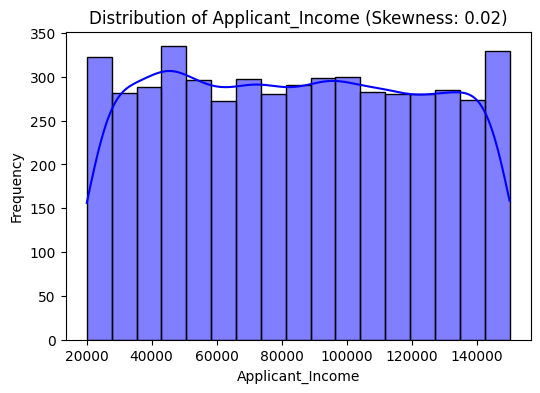

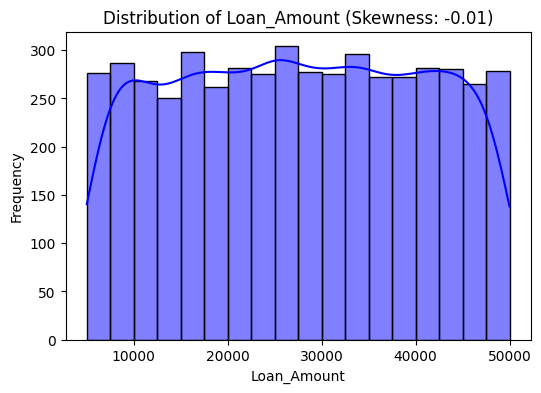

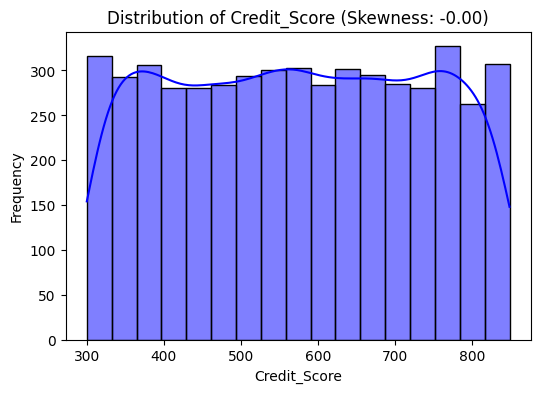

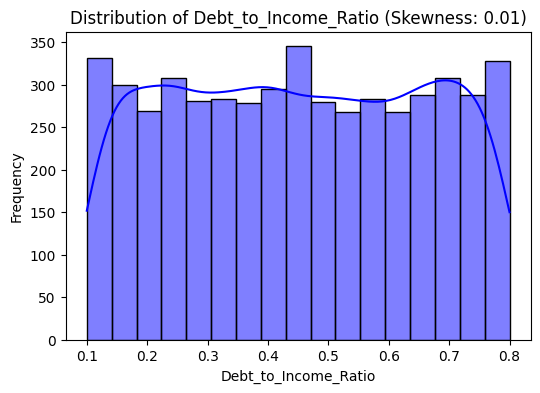

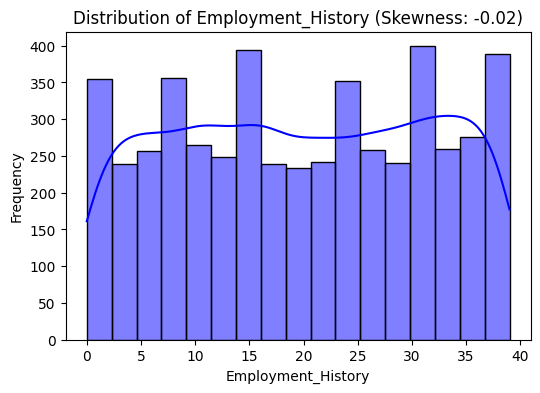

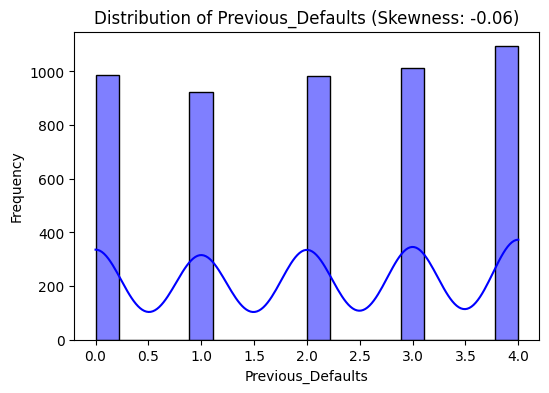

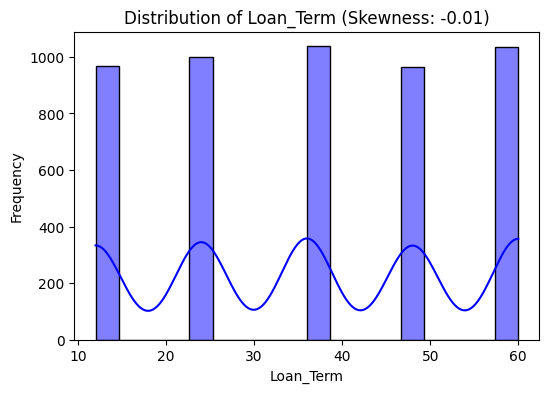

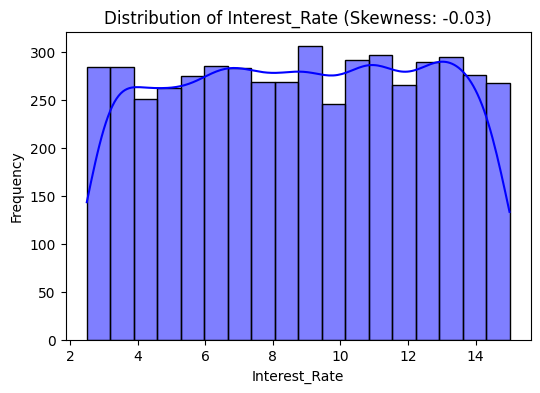

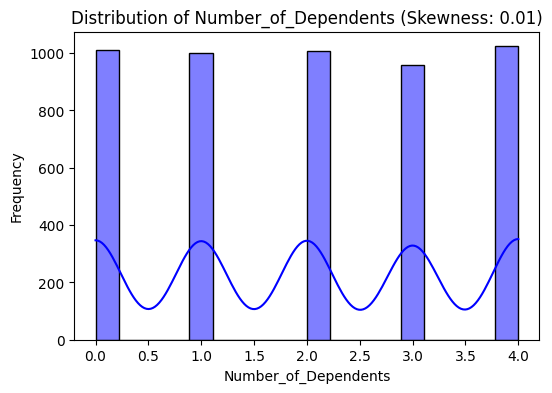

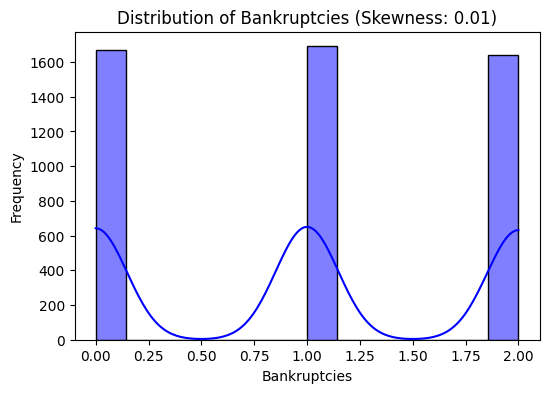

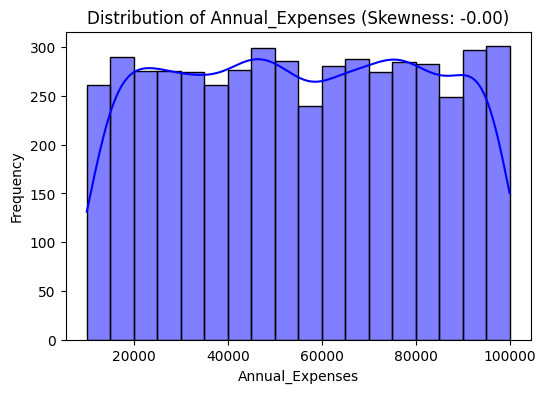

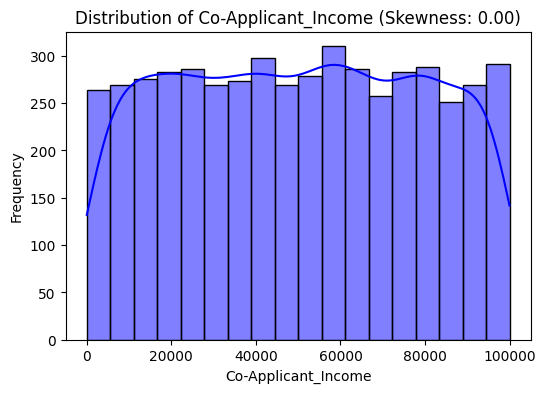

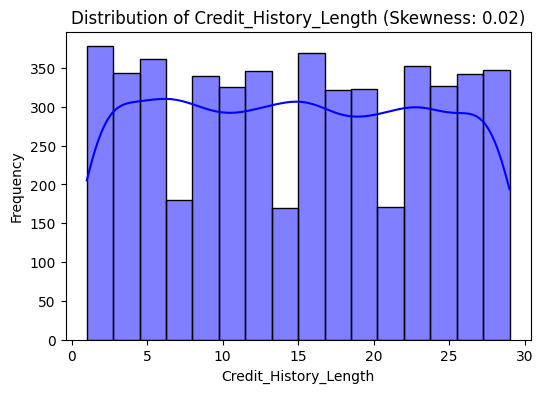

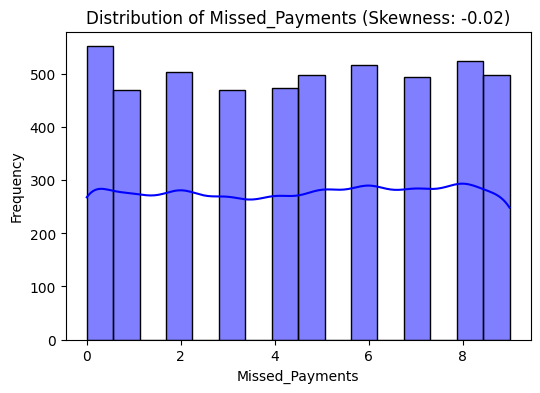

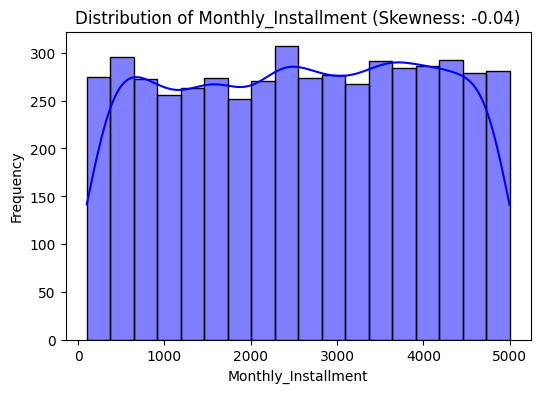

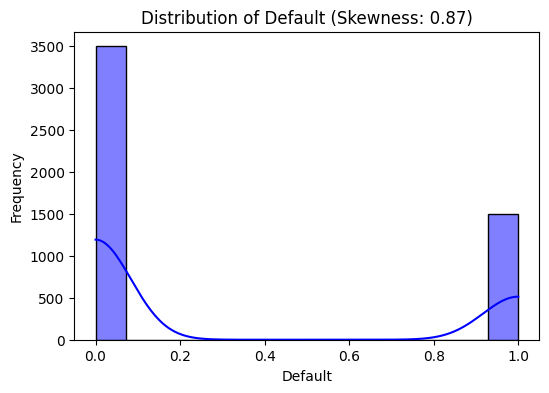

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize skewness for numerical features
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature].dropna(), kde=True, color='blue')
    plt.title(f"Distribution of {feature} (Skewness: {skew(df[feature].dropna()):.2f})")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

Let us check the distribution of the "Self_Employed" feature

In [19]:
df['Self_Employed'].value_counts(normalize=True)

Self_Employed
0    0.843
1    0.157
Name: proportion, dtype: float64

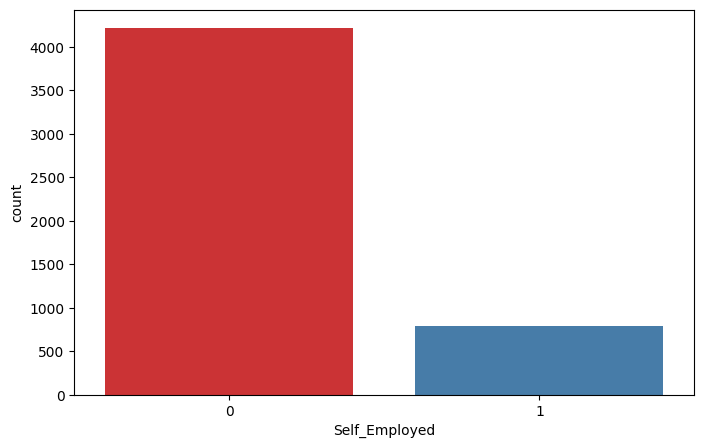

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Self_Employed', palette='Set1')
plt.show()

From the visual analysis, we can see that most of the applicants are not self-employed. Even if the feature seems to be imbalanced, it reflects the real situation. So, let us leave the distribution of the feature as it is.

Now, let us check the distrubution of the categorical features

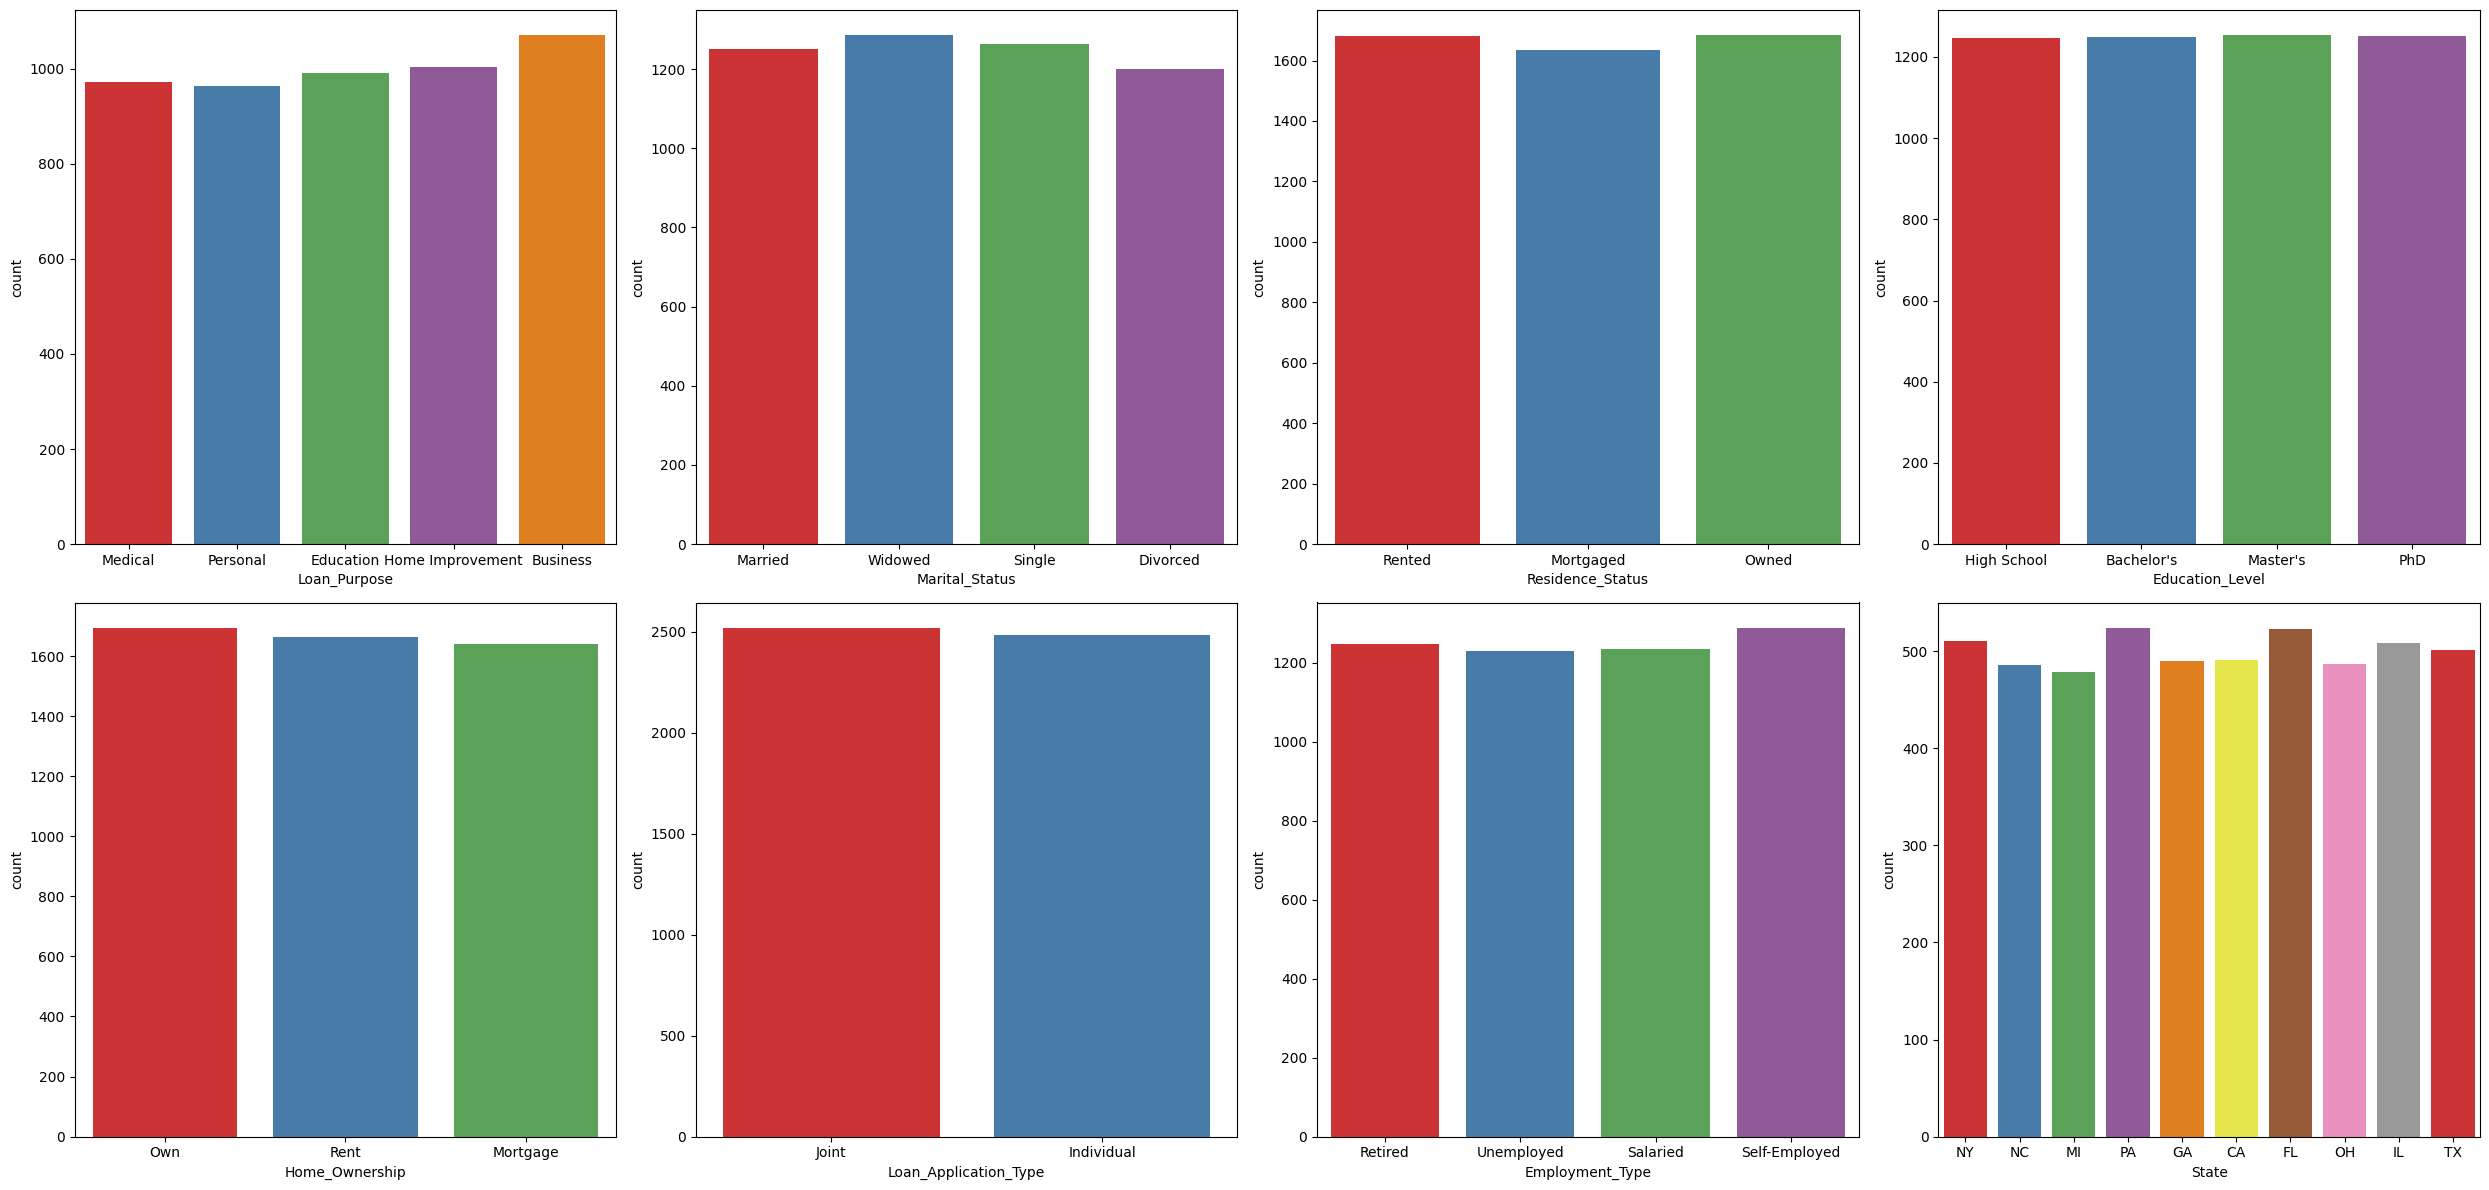

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(25,12))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col, ax in zip(cat_features, axes):
    sns.countplot(data = df,x = col, ax = ax, palette = 'Set1')
    plt.xlabel(col)
    fig.tight_layout()
plt.show()

The visual analysis reveals that all categorical features exhibit a uniform distribution, with the categories being evenly represented across the dataset.

### After analyzing the results of EDA and Chi-Square, we will drop the features that are not useful for the model.


### **Categorical Features to Keep**
These features might hold meaningful information despite the chi-square results, due to their practical relevance or domain-specific insights:

1. **Loan_Purpose**:
   - The type of loan (e.g., "Car", "House", "Personal") could influence default likelihood based on varying levels of risk associated with loan types.
   - Example: Personal loans might have higher default rates than secured loans like home loans.

2. **Employment_Type**:
   - Employment status (e.g., "Salaried", "Self-Employed") is directly related to income stability and repayment ability.

3. **Residence_Status** (Optional):
   - Ownership status (e.g., "Owner", "Renter") might indicate financial stability, though the chi-square results didn’t show strong dependency.

4. **Home_Ownership** (Optional):
   - Home ownership (e.g., "Owned", "Mortgaged", "Rented") may provide insights into financial stability, particularly for long-term loans.


### **Categorical Features to Drop**
These features showed consistently weak dependency with the target variable (`Default`), and their inclusion may add noise to the model without improving performance:
- `Marital_Status`: Limited relevance to loan default prediction.
- `Education_Level`: May have indirect influence but weak statistical dependency.
- `Loan_Application_Type`: Whether the application was made online or in-branch likely has no direct impact on default behavior.
- `State`: Geographic information might have minimal relevance unless there are strong regional patterns in default rates.
- `Self_Employed`: The `Employment_Type` feature already captures the employment category of the applicant, making `Self_Employed` redundant.

---

Based on the chi-square test results and logical relevance, here’s the list of **numerical features to drop** that showed no significant dependency with the target variable (`Default`):

### **Numerical Features to Retain**
These features may hold predictive power and are logically relevant to loan defaults:
1. **Applicant_Income**: A key feature for understanding repayment capability.
2. **Loan_Amount**: Critical for assessing the size of financial risk.
3. **Credit_Score**: Strong practical relevance in evaluating creditworthiness.
4. **Interest_Rate**: Indicates the perceived risk associated with the loan.
5. **Previous_Defaults**: Directly linked to historical default behavior.
6. **Income_Loan_Ratio**: Derived feature that captures the affordability of the loan.


### **Numerical Features to Drop**
1. **Debt_to_Income_Ratio**:
   - High p-value (0.8231) indicates no statistical relationship with `Default`.
   - This feature might not add predictive value.

2. **Employment_History**:
   - Very weak dependency (p-value = 0.9305) with the target variable.

3. **Loan_Term**:
   - Chi-square result (p-value = 0.1435) suggests no strong relationship.

4. **Missed_Payments**:
   - Despite its intuitive connection to defaults, the test didn’t reveal a dependency (p-value = 0.7824).

5. **Credit_History_Length**:
   - High p-value (0.8401), indicating weak or no statistical relationship.

6. **Bankruptcies**:
   - Low statistical relevance (p-value = 0.1290).

7. **Co-Applicant_Income**:
   - Minimal impact as per test results (p-value = 0.5059).

8. **Annual_Expenses**:
   - No strong dependency (p-value = 0.5846).

9. **Monthly_Installment**:
   - Weak dependency (p-value = 0.6579).



---


### Why Drop Weak Features?
- Dropping features that don’t improve model performance or show statistical dependency reduces dimensionality, simplifies the model, and prevents overfitting.
- **Logical Relevance**: Features like `Loan_Purpose` and `Employment_Type` align with real-world factors influencing loan defaults.
- **Simplicity**: Dropping irrelevant features helps reduce dimensionality, making the dataset easier to work with while maintaining interpretability.






In [22]:
# List of features to drop
features_to_drop = [
    'Marital_Status', 'Education_Level', 'Loan_Application_Type', 'State',
    'Debt_to_Income_Ratio', 'Employment_History', 'Loan_Term', 'Missed_Payments',
    'Credit_History_Length', 'Bankruptcies', 'Co-Applicant_Income', 'Annual_Expenses',
    'Monthly_Installment', 'Self_Employed'    
]

# Drop the features
df = df.drop(columns=features_to_drop, errors='ignore')

# Display the remaining columns
print("Remaining features:", df.columns)

Remaining features: Index(['Applicant_Income', 'Loan_Amount', 'Credit_Score', 'Previous_Defaults',
       'Interest_Rate', 'Loan_Purpose', 'Number_of_Dependents',
       'Residence_Status', 'Home_Ownership', 'Employment_Type', 'Default'],
      dtype='object')


In [23]:
df.to_csv('data/cleaned_data.csv', index = False)